In [5]:
import numpy as np
from skimage import io, data, filters, util, color, transform, exposure, measure
from scipy import ndimage, stats, fft, linalg

import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_uint, img_as_ubyte
from sklearn import preprocessing
# permite dividir o conjunto de dados en treino e teste
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
from sklearn import svm
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Base de datos Iris

<img src="https://drive.google.com/uc?id=1r_fDDsCLOCQVbhLldmdNfoyuCPH-VvwK" alt="Drawing"  width="900"/>



<ul>
    <li>50 ejemplos de 3 diferentes especies de flores de iris</li>
    <li>Medidas:  largo y ancho de las sépalas y pétalas, en centímetros </li>
</ul>

## Cargando a base Iris

In [6]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
print(f'Informações presentes no dataset: {iris.keys()}')
print(f'Atributos do conjunto de dados: {iris.feature_names}')
print(f'Nomes das classes: {iris.target_names}')
print(f'Tamanho dos dados: {iris.data.shape}')
print(f'Tamanho das etiquetas: {iris.target.shape}')

Informações presentes no dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Atributos do conjunto de dados: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nomes das classes: ['setosa' 'versicolor' 'virginica']
Tamanho dos dados: (150, 4)
Tamanho das etiquetas: (150,)


In [8]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [9]:
def scatter_iris(X, Y, x_label = 'X1', y_label = 'X2'):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(x_label, fontsize = 15)
    ax.set_ylabel(y_label, fontsize = 15)
    ax.set_title('Scatter')
    
    targets = ['Iris_setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']
    markers = ['+', 'o', 'd']
    
    for i, (marker, target, color) in enumerate(zip(markers, targets, colors)):
        ind = Y == i
        ax.scatter(X[ind,0], X[ind,1], c = color, s = 50, marker=marker)
    ax.legend(targets)
    ax.grid()

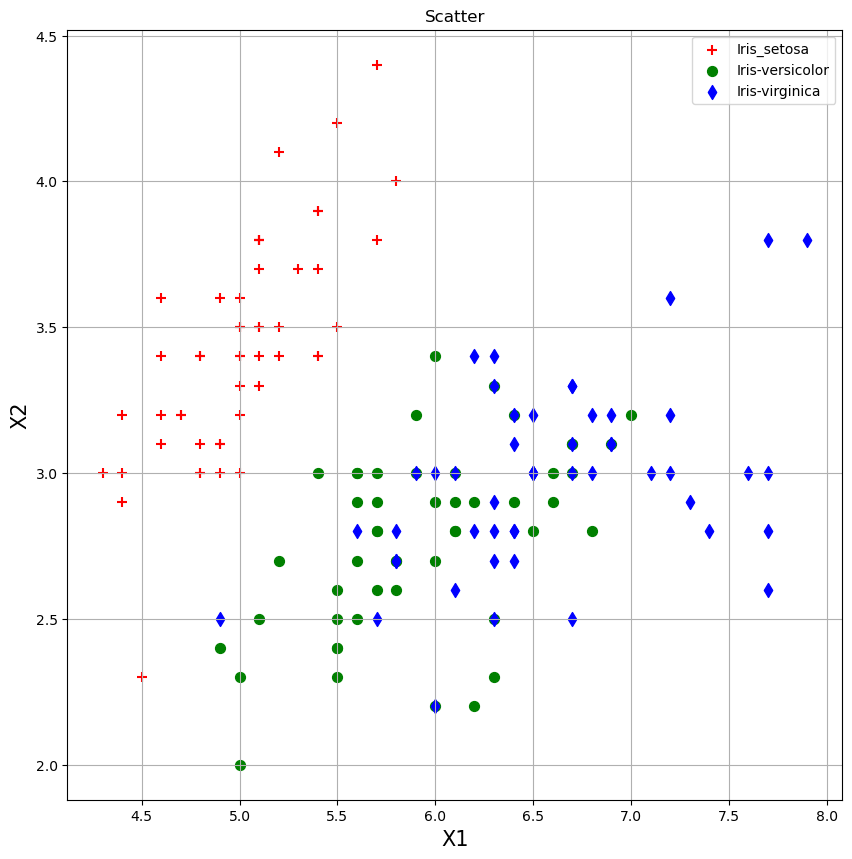

In [10]:
scatter_iris(iris.data[:,:2], iris.target)

### PCA


In [11]:
from sklearn import decomposition

In [25]:
pca = decomposition.PCA(n_components=2)
pca.fit(iris.data)

PCA(n_components=1)

In [26]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92461872]
[25.09996044]


In [27]:
nX = pca.transform(iris.data)
print(nX.shape)

(150, 1)


IndexError: index 1 is out of bounds for axis 1 with size 1

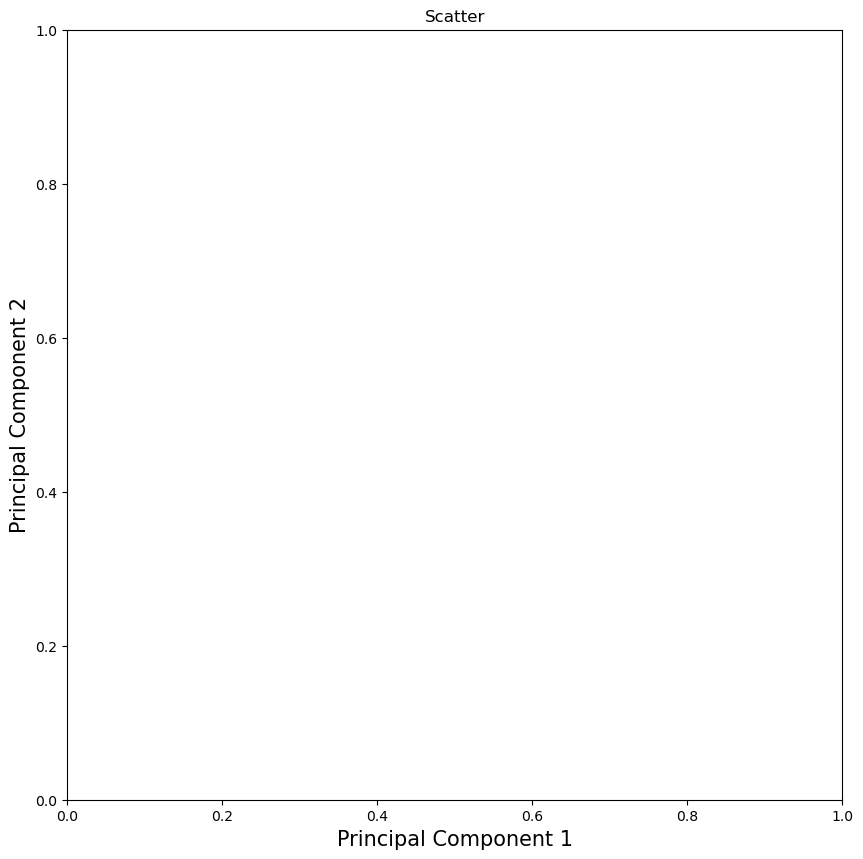

In [28]:
scatter_iris(nX, iris.target, 'Principal Component 1', 'Principal Component 2')

### Clasificación de imágenes

## Ensambles

In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [31]:
data_train = pd.read_csv('mnist_train.csv')
data_test = pd.read_csv('mnist_test.csv')

In [36]:
x_train = data_train.iloc[:,1:]
y_train = data_train.iloc[:,0]

x_test = data_test.iloc[:,1:]
y_test = data_test.iloc[:,0]

In [34]:
28*28

784

In [39]:
# DecisionTree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
dt.score(x_test, y_test)

0.8761

In [41]:
dt.score(x_train, y_train)

1.0

### RandomForest

In [43]:
# DecisionTree
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
rf.score(x_test, y_test)

0.9694

### Bagging

In [46]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=20)
bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [47]:
bg.score(x_test,y_test)

0.9471

### AdaBoost

In [49]:
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=10)

In [50]:
adb.score(x_test, y_test)

0.8771

In [51]:
adb.score(x_train, y_train)

1.0

### Voting Classifier

In [53]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel='poly', degree=2)

In [56]:
evc = VotingClassifier( estimators=[('lr', lr), ('dt', dt), ('svm', svm)], voting='hard')
evc.fit(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(degree=2, kernel='poly'))])

In [57]:
evc.score(x_test, y_test)

0.96

In [28]:
digits= datasets.load_digits()

In [30]:
print(len(digits.images))

1797


### Clasificacion de digitos

<p align="justify">O reconhecimento de padrões é o estudo de como as máquinas observam seu entorno, aprendem a distinguir padrões de interesse e tomam decisões razoáveis sobre as categorias dos padrões Um padrão é uma descrição de um objeto. Um computador consegue reconhecer padrões, convertendo-os em sinais digitais e comparando-os com outros sinais já armazenados na memória.  </p>

<p align="justify">Un sistema de reconocimiento generalmente consta de tres componentes principales: preprocesamiento, extracción de características y clasificación. En la etapa de preprocesamiento, los datos de entrada se manipulan mediante una variedad de métodos que realizan operaciones como la eliminación de ruido, la segmentación y la mejora de la calidad. En la extracción de características, el objetivo es representar los datos de entrada en términos de medidas cuantificables que se pueden usar fácilmente en el paso de clasificación. El problema del reconocimiento de patrones es reconocer patrones que son, de alguna manera,
sentido, "el mismo" a pesar de haber experimentado una variedad de transformaciones permisibles. Los patrones de la vida real presentan transformaciones geométricas lineales (rotación, escala y traslación), deformaciones no lineales y variación de iluminación y <i>fondo</i>, etc. Este tipo de reconocimiento puede ser una tarea sencilla para humanos y animales, pero se convierte en un gran problema si intentamos hacerlo a través de un ordenador. Los métodos tradicionales de reconocimiento de patrones carecen de la capacidad de reconocer el mismo patrón con cierto tipo de variación.
</p>

<p align="justify">
Realice los siguientes pasos para cada imagen de base de datos:
</p>

<ol>
     <li>Para cada imagen proporcionada, genere 20 imágenes con diferentes rotaciones</li>
     <li>Cada imagen girada debe cambiarse de tamaño en seis escalas diferentes: 0.5, 0.75, 1, 1.25, 1.5, 2</li>
     <li>Inserte ruido de sal y pimienta en cada imagen redimensionada. Utilice los siguientes valores de ruido: 0, 0.01, 0.02, 0.03</li>
     <li>Extraiga los momentos Hu de cada imagen y guarde el descriptor en una matriz y la etiqueta a la que pertenece en un vector.</li>

</ol>


In [11]:
import zipfile
import os

In [ ]:
!gdown 1g7sA9bPWYOKRcTew88EDV_mdxR0j1rl4

In [12]:
local_zip = 'numbers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp')
zip_ref.close()

In [13]:
m_path = 'tmp/numbers'
img_files = os.listdir(m_path)
print(img_files)

['num0.jpg', 'num1.jpg', 'num2.jpg', 'num3.jpg', 'num4.jpg', 'num5.jpg', 'num6.jpg', 'num7.jpg', 'num8.jpg', 'num9.jpg']


In [14]:
img_files.sort()
print(img_files)

['num0.jpg', 'num1.jpg', 'num2.jpg', 'num3.jpg', 'num4.jpg', 'num5.jpg', 'num6.jpg', 'num7.jpg', 'num8.jpg', 'num9.jpg']


In [15]:
def Hu_moments(img):
  momentos_centrais = measure.moments_central(img)
  momentos_normalizados = measure.moments_normalized(momentos_centrais)
  momentos_hu = measure.moments_hu(momentos_normalizados)
  return momentos_hu

In [16]:
def feature_extraction(m_path, img_files):

  angs = np.linspace(0,180,20)
  tams = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
  ruidos = [0, 0.01, 0.02, 0.03, 0.04]

  N = len(img_files) * len(angs) * len(tams) * len(ruidos)
  hu_X = np.zeros( (N,7) )
  hu_Y = np.zeros( (N) )
  pos = 0

  for l, file in enumerate(img_files):
      img = io.imread(os.path.join(m_path, file), as_gray = True)
      print(file)
      for ang in angs:
          rimg = transform.rotate(img, ang, resize = False)
          for tam in tams:
              simg = transform.rescale(rimg, tam)
              for ruido in ruidos:
                  nimg = util.random_noise(simg, 's&p', amount=ruido)
                  #nimg = (nimg * 255).astype('uint8')
                  ###centralmom = measure.moments_central(nimg)
                  ###normmon = measure.moments_normalized(centralmom)
                  ##humom = measure.moments_hu(normmon)
                  humom = Hu_moments(nimg)
                  hu_X[pos,:] = humom
                  hu_Y[pos] = l
                  pos += 1
  return hu_X, hu_Y

In [17]:
hu_X, hu_Y = feature_extraction(m_path='tmp/numbers', img_files = img_files)

num0.jpg
num1.jpg
num2.jpg
num3.jpg
num4.jpg
num5.jpg
num6.jpg
num7.jpg
num8.jpg
num9.jpg


<ol start="5">
   <li>Normalizar los datos.</li>
     <li>Divida la base en dos juegos, uno para probar y otro para entrenar.</li>
     <li>Realizar entrenamiento usando un clasificador SVM</li>
     <li>Calcule la tasa de aciertos para cada tipo de dígito. Además, genere una matriz de confusión.</li>
</ol>

In [18]:
# normalização
#X_new = preprocessing.MinMaxScaler().fit_transform(X)
minmax_scaler = preprocessing.MinMaxScaler().fit(hu_X)
hu_Xn = minmax_scaler.transform(hu_X)
# padronização
std_scaler = preprocessing.StandardScaler().fit(hu_X)
hu_Xp = std_scaler.transform(hu_X)

[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.99 0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.02 0.   0.98 0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.   0.3  0.   0.   0.69]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.07 0.   0.   0.   0.01 0.   0.   0.   0.93 0.  ]
 [0.   0.   0.   0.   0.   0.   0.3  0.   0.   0.7 ]]


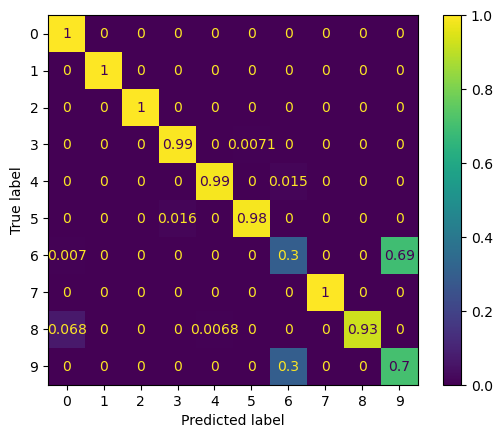

In [19]:
x_train, x_test, y_train, y_test = train_test_split(hu_Xp, hu_Y, test_size=0.2)
clf_svm = svm.SVC(C=5, kernel='linear')
clf_svm.fit(x_train, y_train)
pred = clf_svm.predict(x_test) 
m = metrics.confusion_matrix(y_test, pred) 
tot = np.sum(m, axis=1, keepdims=True) 
np.set_printoptions(precision=2)
m_porc = m/tot
print(m_porc)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m_porc, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

In [20]:
img = io.imread('https://drive.google.com/uc?id=1iewo9yp9i_S-AXAvkdJA0LzUeKZNJGi7', as_gray=True)

In [21]:
io.imsave('numeros.png', img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [22]:
numeros = io.imread('numeros.png')
print(img.shape)
print(img.max())

(139, 501)
1.0


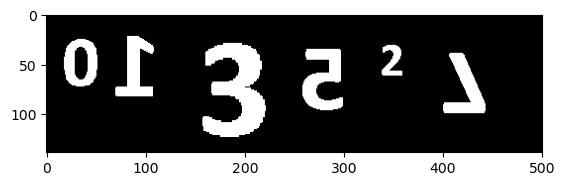

In [23]:
img = img > 0.5
plt.imshow(img, cmap='gray')

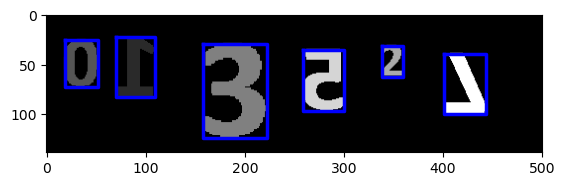

In [24]:
img_label = measure.label(img)
regions = measure.regionprops(img_label)
fig, ax = plt.subplots()
ax.imshow(img_label, cmap=plt.cm.gray)
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

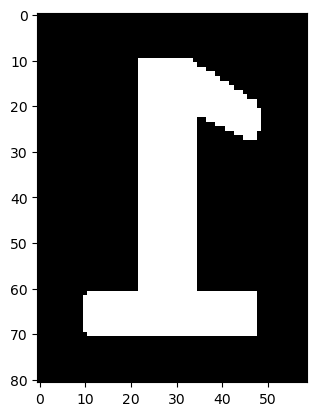

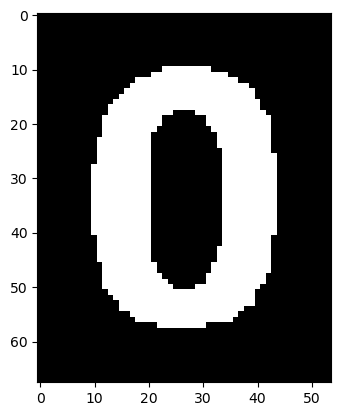

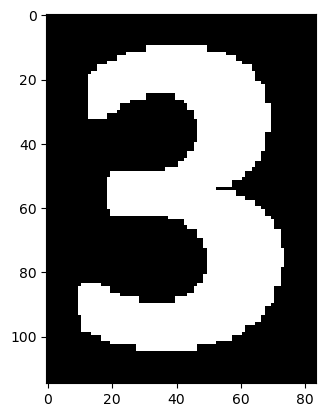

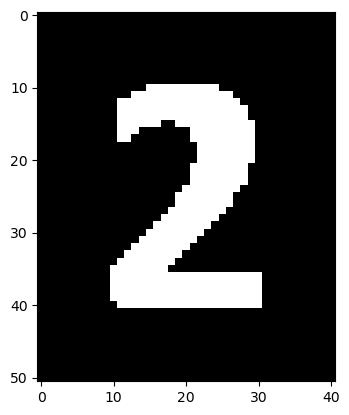

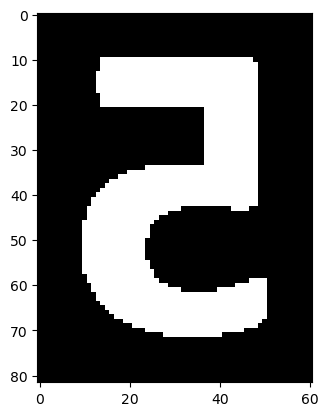

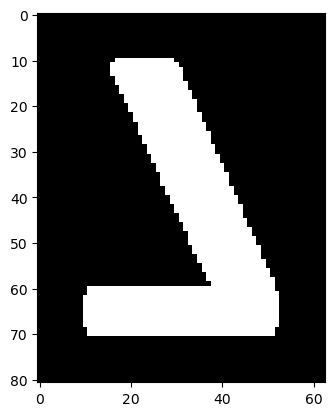

In [25]:
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    delta = 10
    minr -= delta
    minc -= delta
    maxr += delta
    maxc += delta
    patch = img[minr:maxr, minc:maxc]
    plt.figure()
    plt.imshow(patch, cmap='gray')

[1.]
[0.]
[3.]
[2.]
[5.]
[7.]


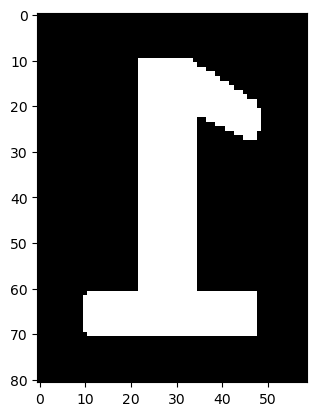

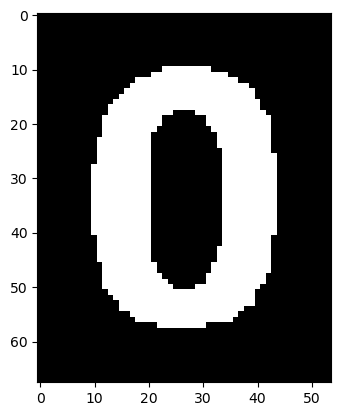

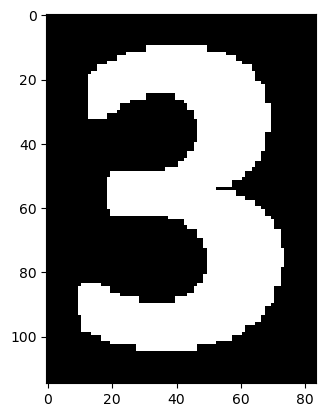

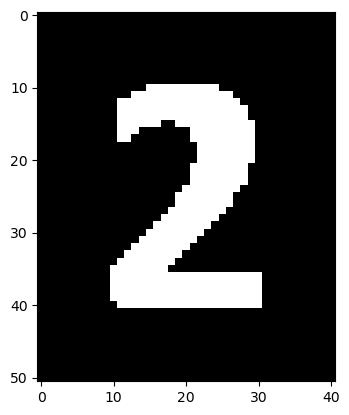

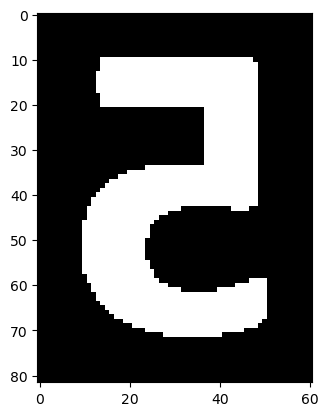

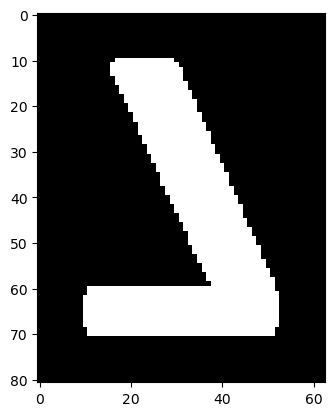

In [26]:
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    delta = 10
    minr -= delta
    minc -= delta
    maxr += delta
    maxc += delta
    patch = img[minr:maxr, minc:maxc]
    plt.figure()
    plt.imshow(patch, cmap='gray')
    #centralmom = measure.moments_central( (patch * 255).astype('uint8') )
    ###centralmom = measure.moments_central( patch )
    ###normmon = measure.moments_normalized(centralmom)
    ###humom = measure.moments_hu(normmon)
    humom = Hu_moments(patch)
    hu_Xp = std_scaler.transform([humom])
    pred = clf_svm.predict(hu_Xp) 
    print(pred)